# Gender Recognition by Voice Machine Learning SVM

In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)

### Reading Data

In [3]:
df=pd.read_csv("voice.csv")

In [4]:
df.sample(5)

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
1841,0.179750,0.034082,0.174082,0.167790,0.187016,0.019226,4.997551,34.136764,0.800227,0.223223,...,0.179750,0.164371,0.015702,0.225352,0.898828,0.164062,6.625000,6.460938,0.139258,female
2522,0.203236,0.038226,0.195420,0.182460,0.231912,0.049452,2.764458,13.374830,0.870564,0.240827,...,0.203236,0.168331,0.046921,0.277457,1.474051,0.023438,8.039062,8.015625,0.136739,female
558,0.111337,0.075083,0.095585,0.047542,0.172154,0.124611,1.792152,8.022700,0.962835,0.735872,...,0.111337,0.084689,0.015671,0.192771,0.195312,0.007812,0.734375,0.726562,0.247909,male
2471,0.151091,0.066940,0.147940,0.099045,0.212299,0.113254,1.047134,6.083770,0.970128,0.725125,...,0.151091,0.179934,0.048436,0.279070,1.493304,0.023438,7.804688,7.781250,0.103473,female
1122,0.186150,0.055903,0.189562,0.142044,0.235547,0.093504,0.851722,2.900995,0.924422,0.444776,...,0.186150,0.128891,0.047291,0.275862,1.298564,0.023438,8.929688,8.906250,0.165461,male


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   meanfreq  3168 non-null   float64
 1   sd        3168 non-null   float64
 2   median    3168 non-null   float64
 3   Q25       3168 non-null   float64
 4   Q75       3168 non-null   float64
 5   IQR       3168 non-null   float64
 6   skew      3168 non-null   float64
 7   kurt      3168 non-null   float64
 8   sp.ent    3168 non-null   float64
 9   sfm       3168 non-null   float64
 10  mode      3168 non-null   float64
 11  centroid  3168 non-null   float64
 12  meanfun   3168 non-null   float64
 13  minfun    3168 non-null   float64
 14  maxfun    3168 non-null   float64
 15  meandom   3168 non-null   float64
 16  mindom    3168 non-null   float64
 17  maxdom    3168 non-null   float64
 18  dfrange   3168 non-null   float64
 19  modindx   3168 non-null   float64
 20  label     3168 non-null   obje

# Seaborn - Heatmap
### Relationship between columns
* 01 --> Direct proportion
* 00 --> No relationship
* -1 --> İnverse proportion

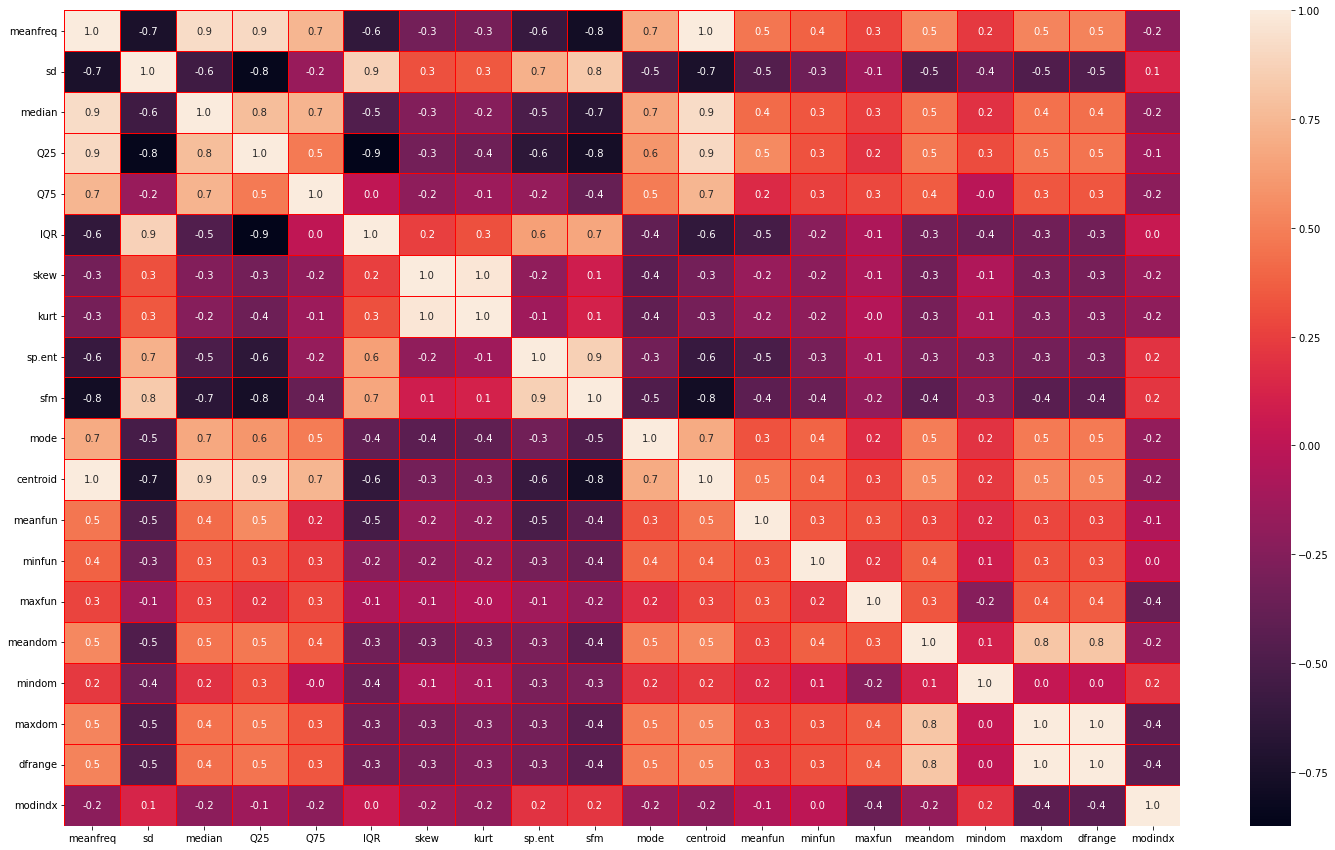

In [7]:
f,ax = plt.subplots(figsize=(25, 15))
sns.heatmap(df.corr(), annot=True, linewidths=0.5,linecolor="red", fmt= '.1f',ax=ax)
plt.show()

# Separating Features and Labels

In [8]:
X=df.iloc[:, :-1]
X.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,0.000000,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,0.000000,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,0.000000,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,0.083878,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,0.104261,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274


# Converting String Value To int Type for Labels
### Encode label category
* Male -> 1
* Female -> 0

In [9]:
df.label.unique()

array(['male', 'female'], dtype=object)

In [10]:
from sklearn.preprocessing import LabelEncoder
y=df.iloc[:,-1]

encoder = LabelEncoder()
y = encoder.fit_transform(y)
print(y)

[1 1 1 ... 0 0 0]


# Data Standardisation

In [11]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

# Splitting Dataset into Training Set and Testing Set

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Build SVM Model with Default Hyperparameter

In [13]:
from sklearn.svm import SVC
from sklearn import metrics
svc=SVC() #Default hyperparameters
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)

# Accuracy Score

In [14]:
print('Accuracy Score:')
print(metrics.accuracy_score(y_test,y_pred))

Accuracy Score:
0.9763406940063092


# Confusion Matrix with Seaborn - Heatmap
* Male -> 1
* Female -> 0

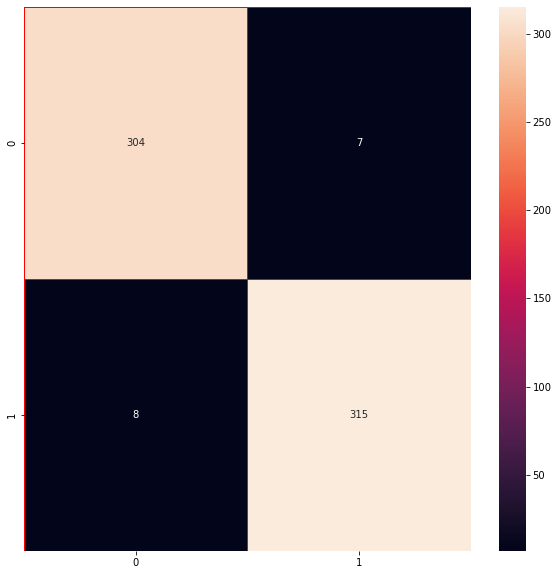

<Figure size 432x288 with 0 Axes>

In [15]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
f,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(cm, annot=True, linewidths=0.5,linecolor="red", fmt= '.0f',ax=ax)
plt.show()
plt.savefig('ConfusionMatrix.png')

# F1 Score

In [16]:
from sklearn.metrics import  f1_score
f1_score = f1_score(y_test, y_pred)
print("F1 Score:")
print(f1_score)

F1 Score:
0.9767441860465117


# Thank You

If you have any suggestion or advice or feedback, I will be very appreciated to hear them.